<a href="https://colab.research.google.com/github/HrushhikeshMate/NBA_Games/blob/main/eda_nba_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
nba_data = pd.read_csv('/content/nba_advanced_2019-2024_data.csv')

In [ ]:
# Display the first few rows and general info to understand the dataset structure
nba_data.head()

,Season,G,Team,Name,Date,At,Opp,W/L,OPts,Location,DPts,Opp_Name,ORtg,DRtg,Pace,Win
0,2019,1,ATL,Atlanta Hawks,2018-10-17,@,NYK,L,107,Away,126,New York Knicks,93.8,110.5,114.0,0
1,2019,2,ATL,Atlanta Hawks,2018-10-19,@,MEM,L,117,Away,131,Memphis Grizzlies,109.9,123.1,106.5,0
2,2019,3,ATL,Atlanta Hawks,2018-10-21,@,CLE,W,133,Away,111,Cleveland Cavaliers,125.5,104.7,106.0,1
3,2019,4,ATL,Atlanta Hawks,2018-10-24,NaN,DAL,W,111,Home,104,Dallas Mavericks,102.7,96.2,108.1,1
4,2019,5,ATL,Atlanta Hawks,2018-10-27,NaN,CHI,L,85,Home,97,Chicago Bulls,82.3,94.0,103.2,0


In [ ]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14120 entries, 0 to 14119
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    14120 non-null  int64  
 1   G         14120 non-null  int64  
 2   Team      14120 non-null  object 
 3   Name      14120 non-null  object 
 4   Date      14120 non-null  object 
 5   At        7059 non-null   object 
 6   Opp       14120 non-null  object 
 7   W/L       14120 non-null  object 
 8   OPts      14120 non-null  int64  
 9   Location  14120 non-null  object 
 10  DPts      14120 non-null  int64  
 11  Opp_Name  14120 non-null  object 
 12  ORtg      14120 non-null  float64
 13  DRtg      14120 non-null  float64
 14  Pace      14120 non-null  float64
 15  Win       14120 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.7+ MB


In [ ]:
# Check for missing values
missing_values = nba_data.isnull().sum()

missing_values


,0
Season,0
G,0
Team,0
Name,0
Date,0
At,7061
Opp,0
W/L,0
OPts,0
Location,0


In [ ]:
# 'At' seems redundant given 'Location' already categorizes as 'Home/Away'
nba_data_cleaned = nba_data.drop(columns=['At'])

In [ ]:
# Confirm there are no critical missing values in important columns
missing_values_cleaned = nba_data_cleaned.isnull().sum()
missing_values_cleaned

,0
Season,0
G,0
Team,0
Name,0
Date,0
Opp,0
W/L,0
OPts,0
Location,0
DPts,0


In [ ]:
# Dataframe info after cleaning
cleaned_info = nba_data_cleaned.info()
cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14120 entries, 0 to 14119
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    14120 non-null  int64  
 1   G         14120 non-null  int64  
 2   Team      14120 non-null  object 
 3   Name      14120 non-null  object 
 4   Date      14120 non-null  object 
 5   Opp       14120 non-null  object 
 6   W/L       14120 non-null  object 
 7   OPts      14120 non-null  int64  
 8   Location  14120 non-null  object 
 9   DPts      14120 non-null  int64  
 10  Opp_Name  14120 non-null  object 
 11  ORtg      14120 non-null  float64
 12  DRtg      14120 non-null  float64
 13  Pace      14120 non-null  float64
 14  Win       14120 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.6+ MB


<ipython-input-47-449c33df6474>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nba_data_cleaned, x='Win', palette='viridis')


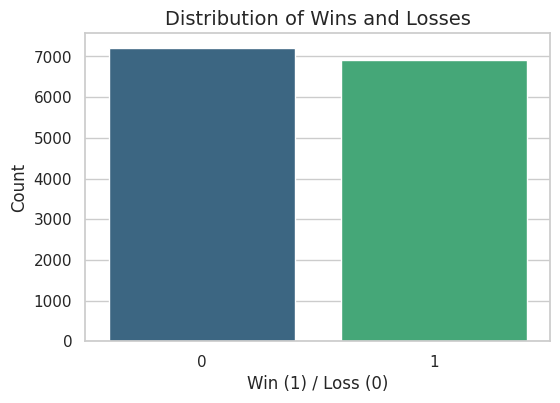

In [ ]:


# Set visualization style
sns.set(style="whitegrid")

# Visualization 1: Distribution of Wins and Losses
plt.figure(figsize=(6, 4))
sns.countplot(data=nba_data_cleaned, x='Win', palette='viridis')
plt.title('Distribution of Wins and Losses', fontsize=14)
plt.xlabel('Win (1) / Loss (0)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



<Figure size 800x500 with 0 Axes>

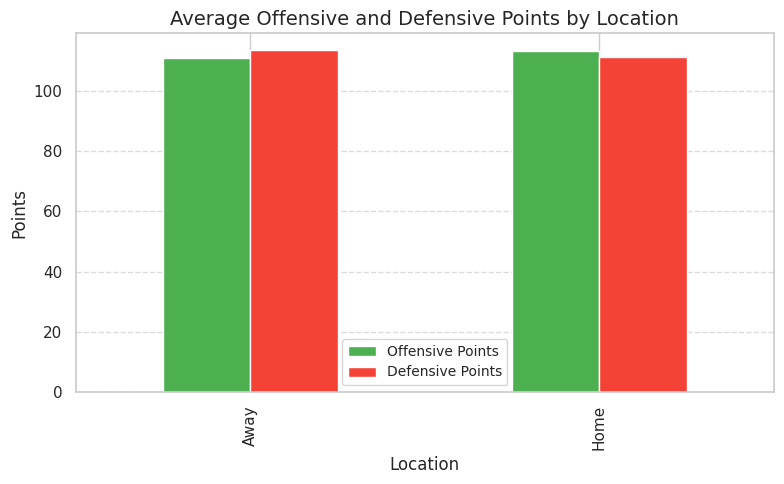

In [ ]:
# Visualization 2: Average Offensive and Defensive Points by Location (Home vs Away)
avg_points_by_location = nba_data_cleaned.groupby('Location')[['OPts', 'DPts']].mean().reset_index()

plt.figure(figsize=(8, 5))
avg_points_by_location.plot(kind='bar', x='Location', stacked=False, figsize=(8, 5), color=['#4CAF50', '#F44336'])
plt.title('Average Offensive and Defensive Points by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.legend(['Offensive Points', 'Defensive Points'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



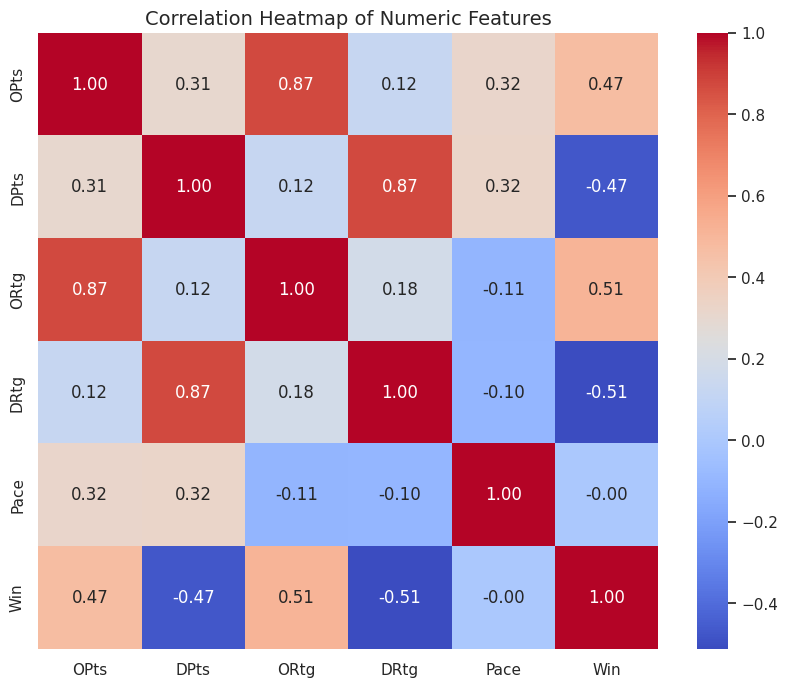

In [ ]:
# Visualization 3: Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 8))
correlation_matrix = nba_data_cleaned[['OPts', 'DPts', 'ORtg', 'DRtg', 'Pace', 'Win']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features', fontsize=14)
plt.show()

# EDA


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



In [ ]:
# Preprocessing - Encoding categorical variables
encoder = LabelEncoder()

# Encode categorical columns: Team, Opp, Opp_Name, Location
nba_data_cleaned['Team'] = encoder.fit_transform(nba_data_cleaned['Team'])
nba_data_cleaned['Opp'] = encoder.fit_transform(nba_data_cleaned['Opp'])
nba_data_cleaned['Opp_Name'] = encoder.fit_transform(nba_data_cleaned['Opp_Name'])
nba_data_cleaned['Location'] = encoder.fit_transform(nba_data_cleaned['Location'])

In [ ]:
nba_data_cleaned = nba_data_cleaned.drop(columns=['W/L'])


In [ ]:
nba_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14120 entries, 0 to 14119
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    14120 non-null  int64  
 1   G         14120 non-null  int64  
 2   Team      14120 non-null  int64  
 3   Name      14120 non-null  object 
 4   Date      14120 non-null  object 
 5   Opp       14120 non-null  int64  
 6   OPts      14120 non-null  int64  
 7   Location  14120 non-null  int64  
 8   DPts      14120 non-null  int64  
 9   Opp_Name  14120 non-null  int64  
 10  ORtg      14120 non-null  float64
 11  DRtg      14120 non-null  float64
 12  Pace      14120 non-null  float64
 13  Win       14120 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.5+ MB


In [ ]:
# Normalize numerical features: OPts, DPts, ORtg, DRtg, Pace
scaler = MinMaxScaler()
numerical_features = ['OPts', 'DPts', 'ORtg', 'DRtg', 'Pace']
nba_data_cleaned[numerical_features] = scaler.fit_transform(nba_data_cleaned[numerical_features])

# Splitting the data into features (X) and target (y)
X = nba_data_cleaned.drop(columns=['Win', 'Name', 'Date'])  # Drop 'Win' (target) and irrelevant columns
y = nba_data_cleaned['Win']

In [ ]:
# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Shapes of resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11296, 11), (2824, 11), (11296,), (2824,))

# ML

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Initialize models
logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
adaboost_model = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train models
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model,
    "AdaBoost": adaboost_model
}

results = {}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)

    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": report
    }


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:

# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("Classification Report:")
    print(result['Classification Report'])
    print("-" * 50)

Model: Logistic Regression
Accuracy: 1.00
Confusion Matrix:
[[1442    0]
 [   3 1379]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       1.00      1.00      1.00      1382

    accuracy                           1.00      2824
   macro avg       1.00      1.00      1.00      2824
weighted avg       1.00      1.00      1.00      2824

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.99
Confusion Matrix:
[[1430   12]
 [   3 1379]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1442
           1       0.99      1.00      0.99      1382

    accuracy                           0.99      2824
   macro avg       0.99      0.99      0.99      2824
weighted avg       0.99      0.99      0.99      2824

--------------------------------------------------
Model: Random Forest
Accuracy: